In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

In [8]:
num_classes = 10 
num_features = 784 

In [11]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

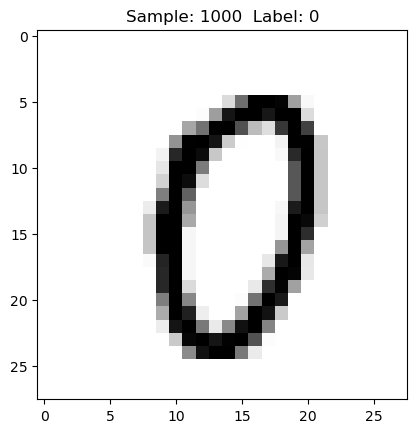

In [12]:
def display_sample(num):
    #Print this sample's label 
    label = y_train[num] 
    
    #Reshape the 784 values to a 28x28 image
    image = x_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1000)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2513 - accuracy: 0.9289 - val_loss: 0.1329 - val_accuracy: 0.9596
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9666 - val_loss: 0.1043 - val_accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0854 - val_accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0795 - val_accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0792 - val_accuracy: 0.9771


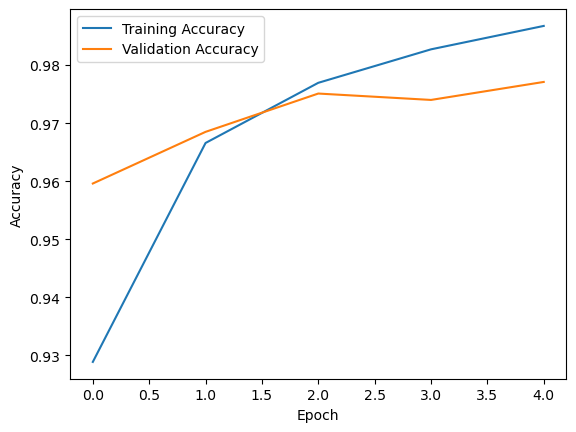

In [3]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2573 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1133 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0785 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0578 - accuracy: 0.9823
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9767
Test accuracy: 0.9767000079154968


313/313 [==============================] - 1s 2ms/step


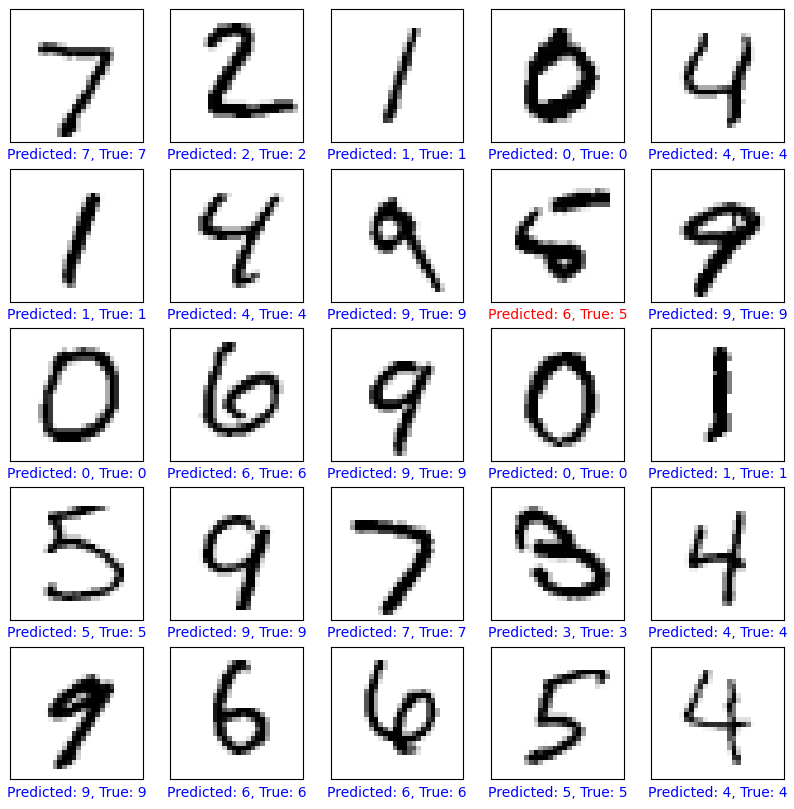

In [4]:
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)
plt.show()